In [2]:
import pandas as pd
import math
import networkx
import matplotlib.pyplot as plt
import requests

In [3]:
def get_interaction_network(species):
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "tsv-no-header"
    method='network'
    
    genes = pd.read_csv(f'data/{species}.tsv', sep='\t')['Gene names  (primary )'].tolist()
    # some genes are empty (rendered as proper float nan's, filter out)
    
    genes = list(filter(lambda x: type(x) != float, genes ))
    
    request_url = "/".join([string_api_url, output_format, method])

    params = {

        "identifiers" : "%0d".join(genes),
        "species" : species, 
        "limit" : 20,
        "required_score": 100,

    }

    response = requests.post(request_url, data=params)
    
    interactions = []
    
    
    for line in response.text.strip().split("\n"):

        l = line.strip().split("\t")
        query_ensp = l[0]
        query_name = l[2]
        partner_ensp = l[1]
        partner_name = l[3]
        combined_score = l[5]
        
        interactions.append([query_ensp, query_name,partner_ensp, partner_name, combined_score ])
    int_df = pd.DataFrame(interactions, columns=['query_ensp', 'query_name', 'partner_ensp', 'partner_name', 'combined_score'])    
    return genes, int_df

In [4]:
def draw_with_resistance_map(resistance_genes, G):
    color_map = []
    for node in G:
        if node in resistance_genes:
            color_map.append('red')
        else: 
            color_map.append('blue')
    fig = plt.figure(1, figsize=(12, 8), dpi=300)
    networkx.draw(G, with_labels=True, node_size=1000, node_color=color_map)

# Gram-positive

### Staphylococcus aureus (strain NCTC 8325 / PS 47)

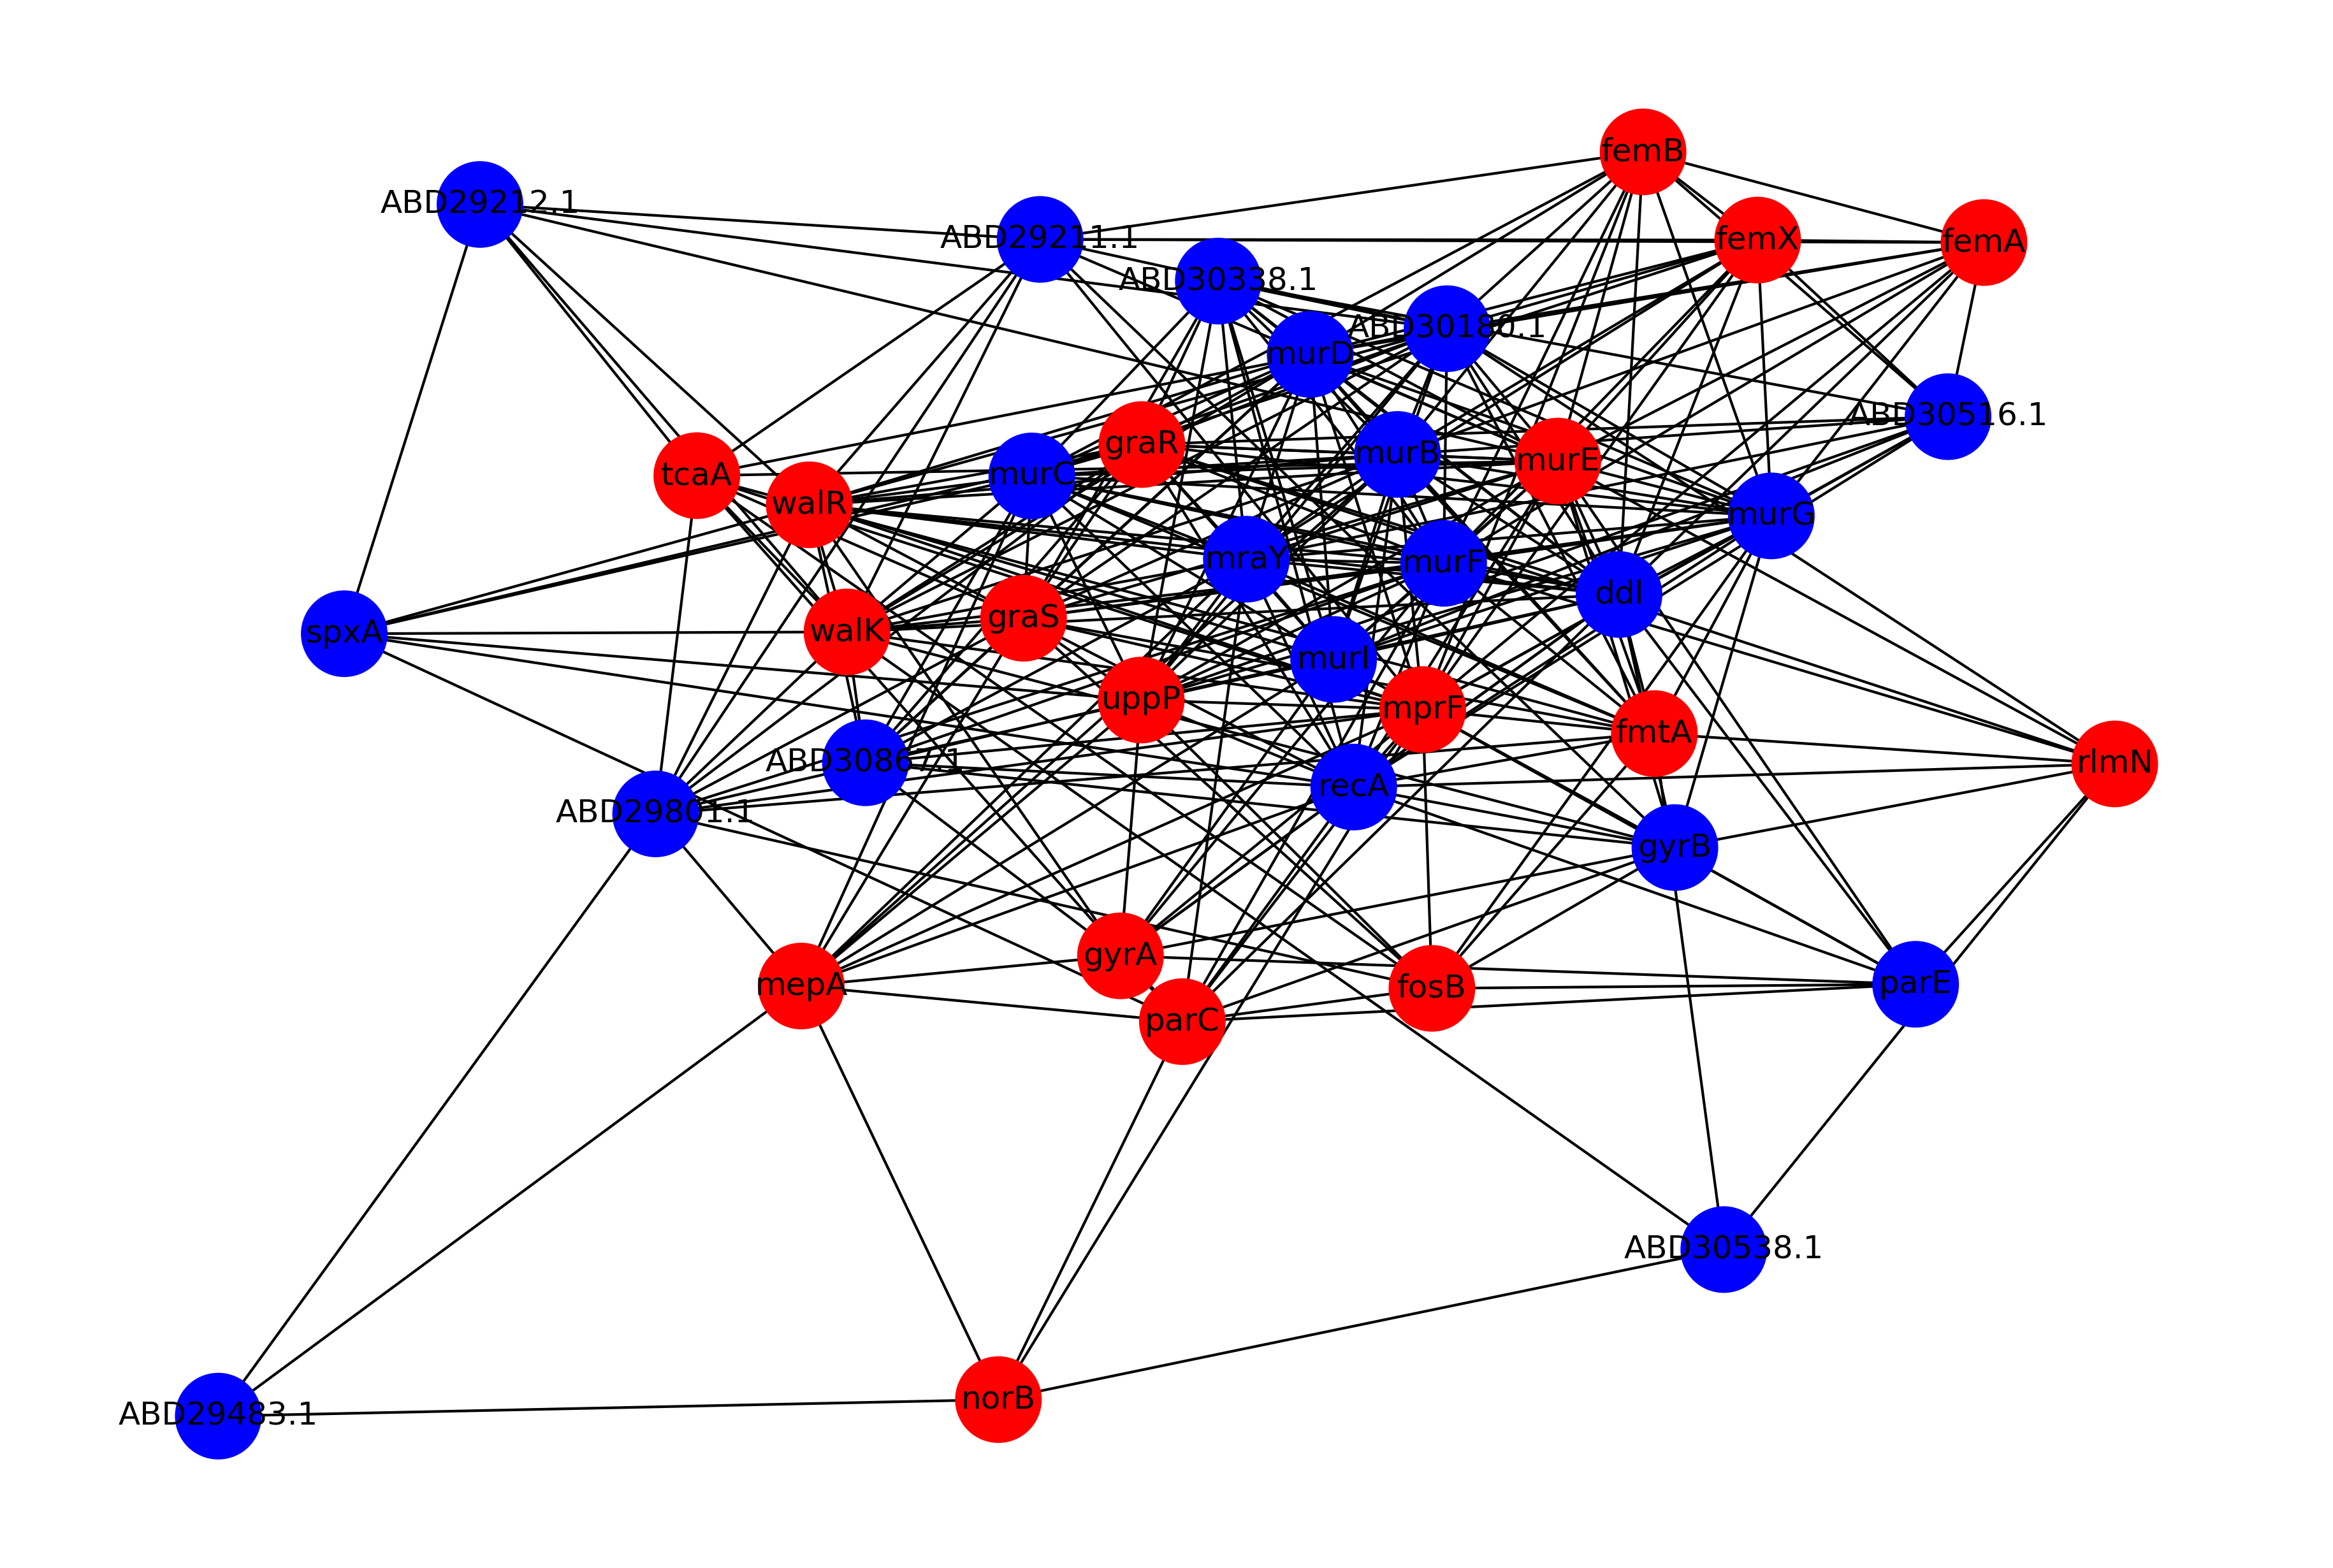

In [5]:
genes, df = get_interaction_network(93061)
# dfw
G = networkx.from_pandas_edgelist(df, 'query_name', 'partner_name', edge_attr=True)

draw_with_resistance_map(genes, G)

# Gram negative

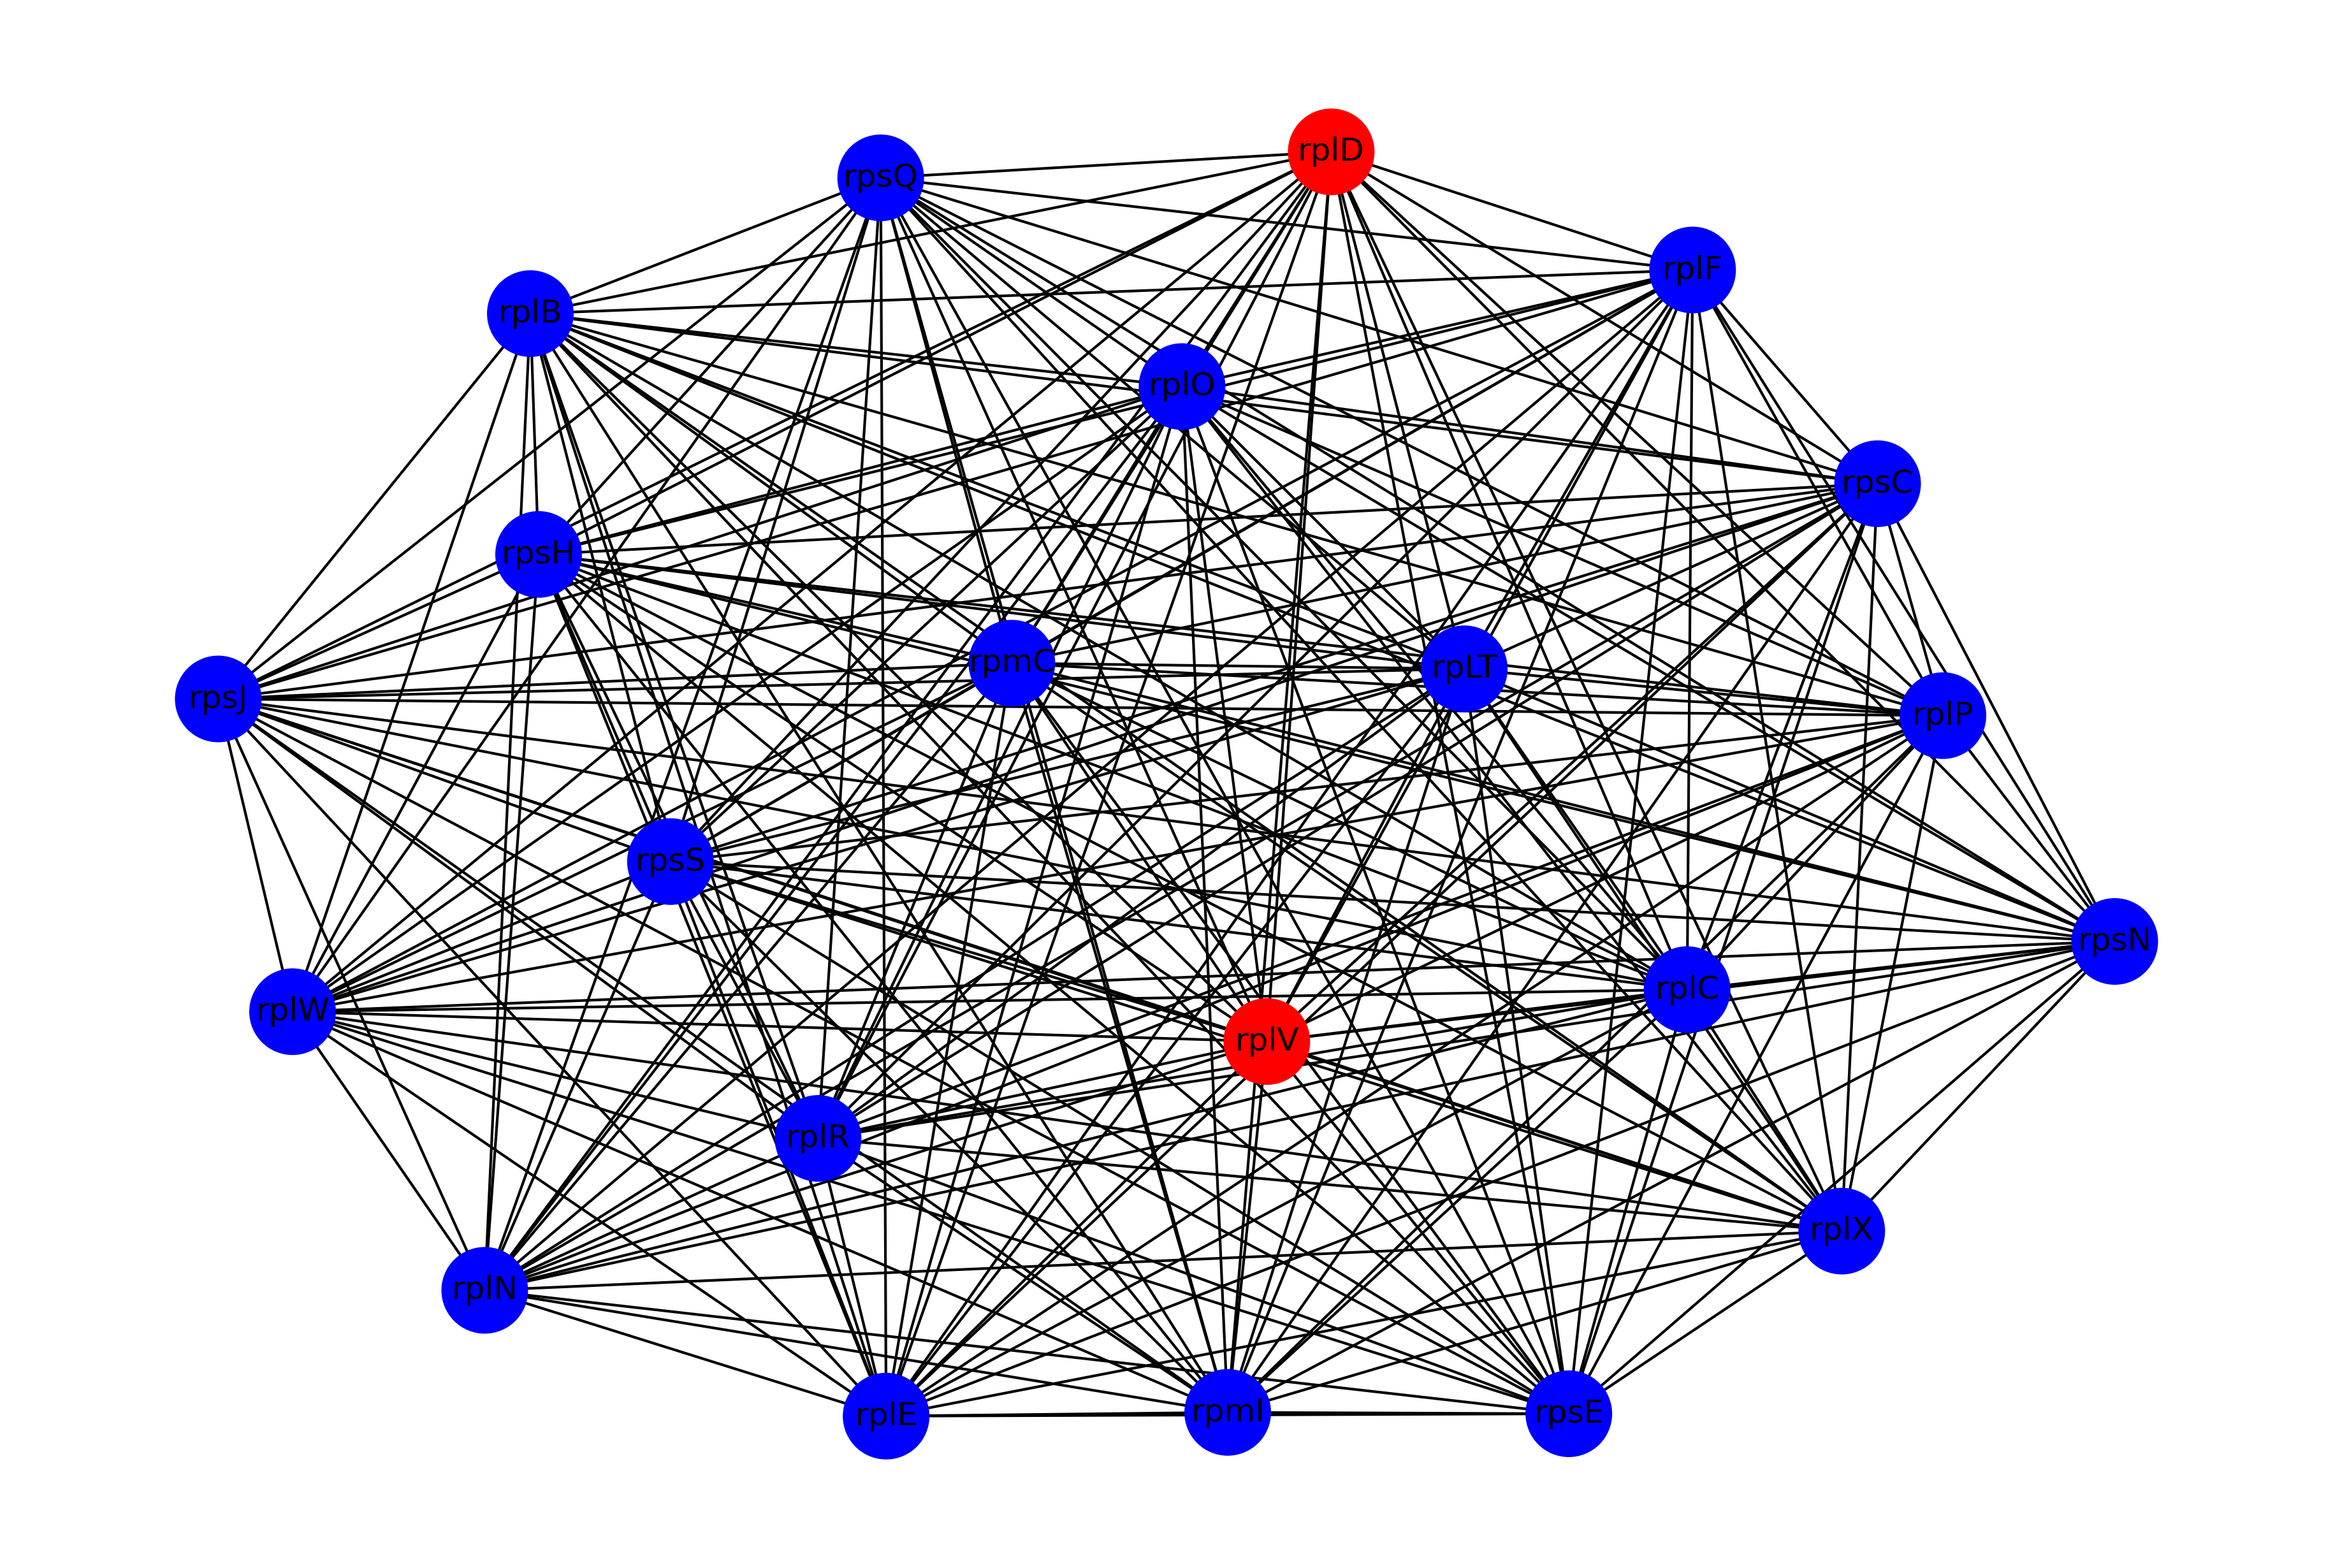

In [6]:
genes, df = get_interaction_network(272634 )
# dfw
G = networkx.from_pandas_edgelist(df, 'query_name', 'partner_name', edge_attr=True)

draw_with_resistance_map(genes, G)

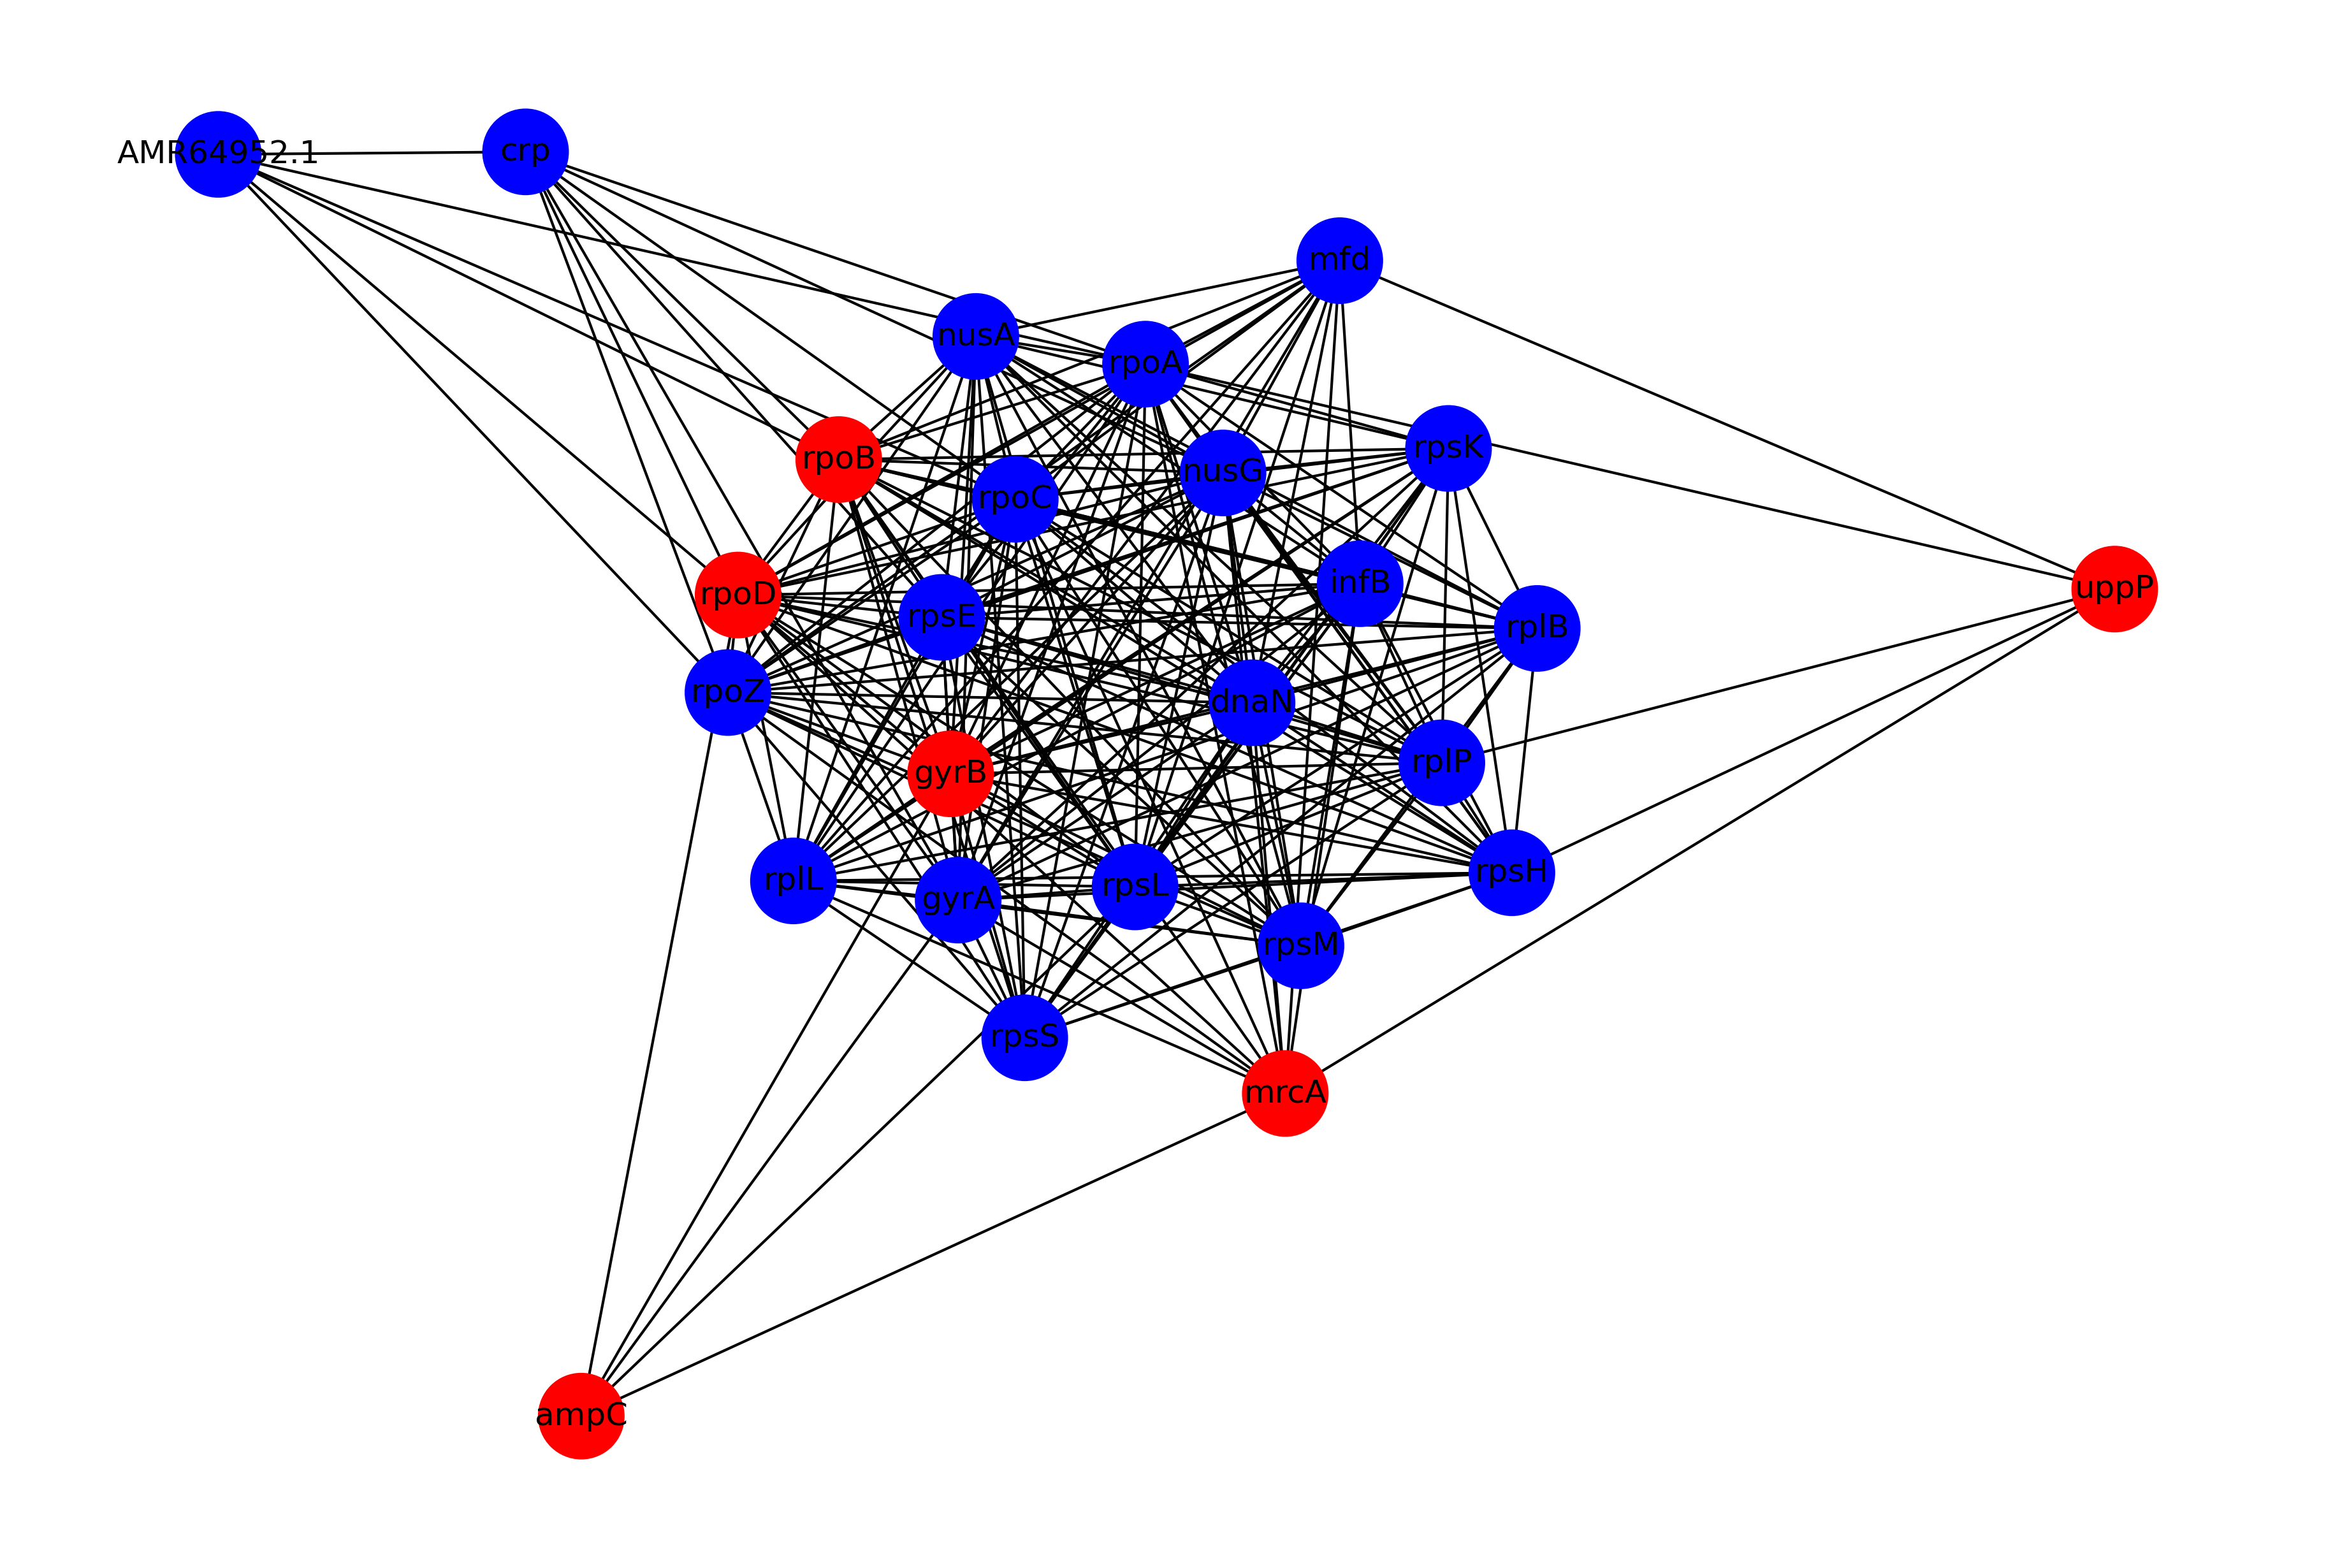

In [7]:
genes, df = get_interaction_network(43263 )
# dfw
G = networkx.from_pandas_edgelist(df, 'query_name', 'partner_name', edge_attr=True)

draw_with_resistance_map(genes, G)